In [24]:
%matplotlib notebook
from ipynb.fs.defs.utilities import *

# Estimation of the available magnetic field of an electromagnetic navigation system.

Computation of available fields in one position is performed inspired by the approach proposed in [Bouchard 2008](https://asmedigitalcollection.asme.org/mechanismsrobotics/article/2/1/011010/475593/On-the-Ability-of-a-Cable-Driven-Robot-to-Generate) to compute available wrench set for a cable driven parallel robot using zonotopes.

A zonotope is a convex polyhedron in a high dimensions; it can be used here to represent the set of magnetic fields that can be generated by an eMNS.

## Functions for the convex hull computation of a zonotope

In [25]:
#Compute the vertices of the convex hull defining the zonotope
def ComputeZonotopeVertices(position,Imin,Imax,J):

    N = np.shape(J)[1]
    pts = np.stack(([0,1],)*N,0)
    A_alpha = np.transpose((np.array(np.meshgrid(*pts)).T).reshape(2**N,N)) #compute permutation matrix
    
    M = np.matmul(J,(Imax - Imin)*np.eye(N))
    C = np.matmul(M,A_alpha)
    
    hull = ConvexHull(np.transpose(C))
    hull_idx = hull.vertices
    C_hull = C[:,hull_idx]
    
    vert = np.transpose(C_hull + np.matmul(J,Imin*np.ones((N,1))))

    return vert

## Application to the Navion eMNS

In [26]:
lim = 0.04
Imin = -50
Imax = 50

VecStart_x = [-lim,0.,0.]
VecStart_y = [0.,-lim,0.]
VecStart_z = [0.,0.,-lim]

VecEnd_x = [lim,0.,0.]
VecEnd_y = [0.,lim,0.]
VecEnd_z  =[0.,0.,lim]

position = np.array([0.0,0.0,0.0])

### Estimation Navion 1

In [27]:
# Load system calibration
cal_path_navion1 = os.path.join('models/Navion_2_Calibration_24-02-2020.yaml')

model_navion1 = ForwardModelMPEM()
model_navion1.setCalibrationFile(cal_path_navion1)

J = model_navion1.getFieldActuationMatrix(position)

In [28]:
J

array([[ 4.64013370e-07, -3.87666273e-04,  3.85165647e-04],
       [-2.90536273e-04,  3.29510083e-04,  3.23198755e-04],
       [-4.13772969e-04, -1.98595364e-04, -1.91504548e-04]])

In [30]:
currents_test = np.array([-35.,35.,35.])
B = model_navion1.computeFieldsFromCurrents(position,currents_test)
B, np.linalg.norm(B)

(array([[-0.00010376],
        [ 0.03301358],
        [ 0.00082856]]),
 0.03302413762059075)

<IPython.core.display.Javascript object>


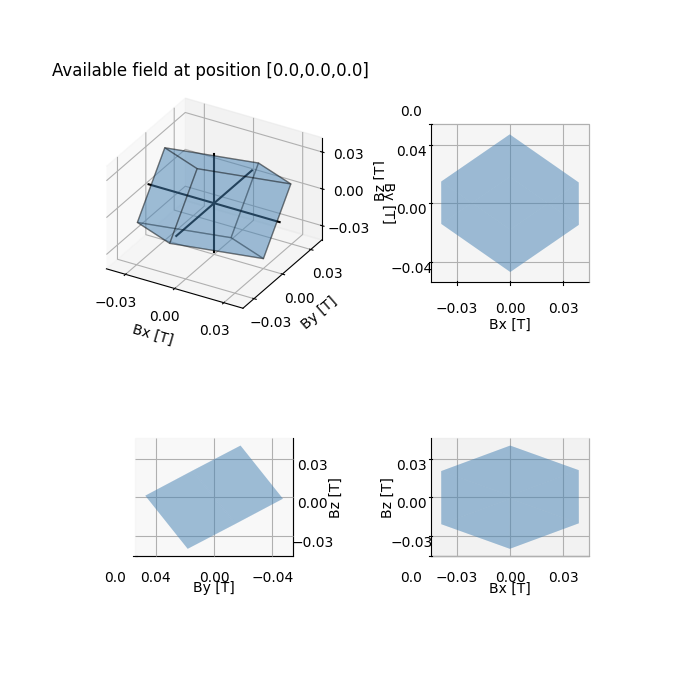

In [7]:
fig = plt.figure(figsize=(7, 7))

#3d views
ax = fig.add_subplot(221,projection='3d', proj_type = 'ortho')
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,edge_color='black')
ax.plot([-lim,lim], [0.,0.], [0.,0.],color='black')
ax.plot([0.,0.],[-lim,lim],  [0.,0.],color='black')
ax.plot([0.,0.],[0.,0.],[-lim,lim],color='black')
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_title('Available field at position [0.0,0.0,0.0]')

#Projections
ax = fig.add_subplot(222,projection='3d', proj_type = 'ortho',azim=-90,elev=90)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

ax = fig.add_subplot(223,projection='3d', proj_type = 'ortho',azim=180,elev=0)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))

ax = fig.add_subplot(224,projection='3d', proj_type = 'ortho',azim=-90,elev=0)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_xlabel('Bx [T]')
ax.set_zlabel('Bz [T]')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))


plt.show()

### Estimation Navion 3

In [8]:
J = np.array([[1.65846e-6, -3.38026e-4, 3.32292e-4], [2.63037e-4, 2.61597e-4, 2.68083e-4], [3.77413e-4, -1.80018e-4, -1.87821e-4]])

In [9]:
J

array([[ 1.65846e-06, -3.38026e-04,  3.32292e-04],
       [ 2.63037e-04,  2.61597e-04,  2.68083e-04],
       [ 3.77413e-04, -1.80018e-04, -1.87821e-04]])

In [10]:
currents_test_n3 = np.array([35.,35.,35.])
B = np.matmul(J,currents_test_n3.transpose())
B, np.linalg.norm(B)

(array([-0.00014264,  0.0277451 ,  0.00033509]), 0.02774748509593857)

<IPython.core.display.Javascript object>


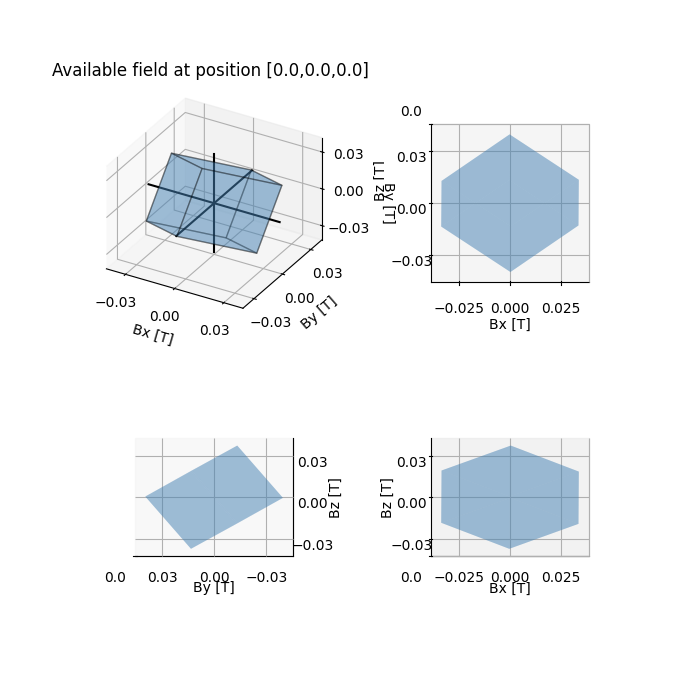

In [11]:
fig = plt.figure(figsize=(7, 7))

#3d views
ax = fig.add_subplot(221,projection='3d', proj_type = 'ortho')
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,edge_color='black')
ax.plot([-lim,lim], [0.,0.], [0.,0.],color='black')
ax.plot([0.,0.],[-lim,lim],  [0.,0.],color='black')
ax.plot([0.,0.],[0.,0.],[-lim,lim],color='black')
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_title('Available field at position [0.0,0.0,0.0]')

#Projections
ax = fig.add_subplot(222,projection='3d', proj_type = 'ortho',azim=-90,elev=90)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

ax = fig.add_subplot(223,projection='3d', proj_type = 'ortho',azim=180,elev=0)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))

ax = fig.add_subplot(224,projection='3d', proj_type = 'ortho',azim=-90,elev=0)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_xlabel('Bx [T]')
ax.set_zlabel('Bz [T]')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))


plt.show()